<a href="https://colab.research.google.com/github/Omanshu840/Long-Document-Classification-using-BERT/blob/main/Preprocessing_20NG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import sys
sys.path.append("./drive/MyDrive/ML-Project/RoBERT")

%matplotlib inline
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd

In [ ]:
dataset = fetch_20newsgroups(subset="all", shuffle=True, remove=("headers", "footers", "quotes"))

In [ ]:
df = pd.DataFrame([dataset.data, dataset.target.tolist()]).T
df.columns = ['text', 'target']

# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(df.shape[0]))

train_raw = df[df.text.notnull()]
print('Number of training sentences with complain narrative not null: {:,}\n'.format(train_raw.shape[0]))

# Display 10 random rows from the data.
train_raw.sample(10)

Number of training sentences: 18,846

Number of training sentences with complain narrative not null: 18,846



,text,target
11485,"Well, it's not that bad. But I am still pretty...",10
18789,,7
11851,\nNo answer.\n\n\nI do not feel like the camer...,16
16710,\n\nI would rather be at a higher risk of bein...,0
16379,\nLet's start over. I'm not arguing about who...,10
12290,I recently got a document describing the JPEG ...,1
3388,\nI beleive this was the source of the Kennedy...,16
16146,I guess that makes Altima the most generic car...,7
10983,"I offer $100, shipment at seller's expense, pa...",6
15823,\nConsider special relativity. It hasn't be p...,0


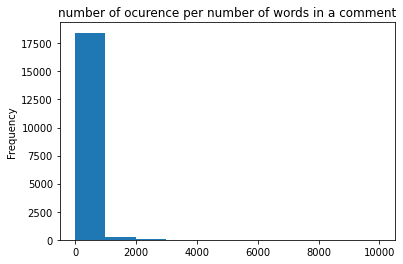

In [ ]:
train_raw.text.apply(lambda x: len(x.split()) if len(x.split())<10000 else 10000).plot(kind='hist', title="number of ocurence per number of words in a comment")

In [ ]:
train_raw['len_txt'] =train_raw.text.apply(lambda x: len(x.split()))
train_raw.describe()

,len_txt
count,2751.000000
mean,759.594693
std,1144.190800
min,250.000000
25%,311.000000
50%,417.000000
75%,691.000000
max,11765.000000


In [ ]:
train_raw = train_raw.assign(len_txt=train_raw.text.apply(lambda x: len(x.split())))
train_raw = train_raw[train_raw.len_txt > 249]
train_raw.count()

text       2751
target     2751
len_txt    2751
dtype: int64

In [ ]:
train_raw = train_raw[['text', 'target']]
train_raw.reset_index(inplace=True, drop=True)
train_raw.head()

,text,target
0,930418\n\nDo what thou wilt shall be the whole...,19
1,\nThe Supreme Court seems to disagree with you...,11
2,\ned>1. All of us that argue about gyroscopes...,8
3,: \n: I am considering buying a 1993 Chevy or ...,7
4,[ . . .]\n\nI am a relativist who would like t...,0


In [ ]:
#all the different classes
for l in np.unique(train_raw['target']):
    print(l)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [ ]:
train_raw=train_raw.rename(columns = {'text':'text', 'target':'label'})
train_raw.head()

,text,label
0,930418\n\nDo what thou wilt shall be the whole...,19
1,\nThe Supreme Court seems to disagree with you...,11
2,\ned>1. All of us that argue about gyroscopes...,8
3,: \n: I am considering buying a 1993 Chevy or ...,7
4,[ . . .]\n\nI am a relativist who would like t...,0


In [ ]:
train_raw.to_csv('./drive/MyDrive/ML-Project/RoBERT/Datasets/newsgroups.csv', index=False)